In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
#from scipy.stats import beta as B
from scipy.stats import beta 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

## Goal: Find Prior Transition Distribution from Infected to Symptomatic Compartment for Omicron variant

According to the report from https://onlinelibrary.wiley.com/doi/epdf/10.1002/jmv.27613, the probability from infected to symptomatic of Omicron is 0.6350(self-reported) with 1119 total study cases.

Another study(https://www.eurosurveillance.org/content/10.2807/1560-7917.ES.2021.26.50.2101147) show 0.91 transition probability for this stage with total 81 cases. 

In [3]:
x = [0.31, 0.43, 0.63, 0.83, 0.95]

In [4]:
a, b = 10, 20
alpha_a = np.linspace(0.001, 200, a)
beta_b = np.linspace(0.001,200, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

In [5]:
def calc_loss(alpha, beta, probs):
    CDFS = scipy.stats.beta.cdf(x, alpha, beta)
    error_p02 = 0.1 * np.square(0.02 - CDFS[0])
    error_p20 = 0.2 * np.square(0.20 - CDFS[1])
    error_p50 = 0.4 * np.square(0.50- CDFS[2])
    error_p80 = 0.2 * np.square(0.80 - CDFS[3])
    error_p98 = 0.1 * np.square(0.98 - CDFS[4])
    error = error_p02 + error_p20 + error_p50 + error_p80 + error_p98
    return error

In [6]:
cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);

In [7]:
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
pd.DataFrame(best_param)

,bestAlpha,bestBeta,bestCost
0,88.889444,52.632316,0.016145


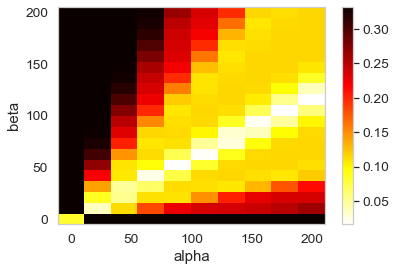

In [8]:
plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

In [9]:
a, b = 20, 20
alpha_a = np.linspace(50, 100, a)
beta_b = np.linspace(30,100, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
pd.DataFrame(best_param)

,bestAlpha,bestBeta,bestCost
0,94.736842,55.789474,0.01608


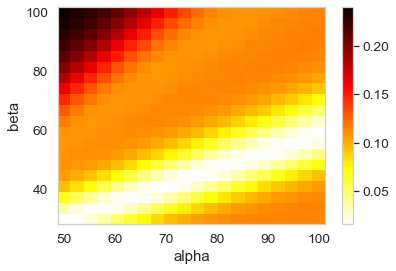

In [10]:
plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha   bestBeta  bestCost
0  94.736842  55.789474   0.01608


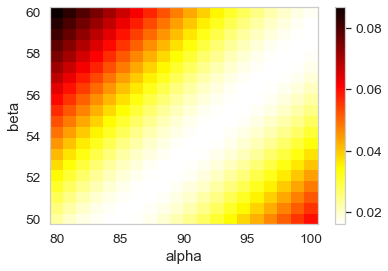

In [11]:
a, b = 20, 20
alpha_a = np.linspace(80, 100, a)
beta_b = np.linspace(50,60, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

## Check the distribution achieves

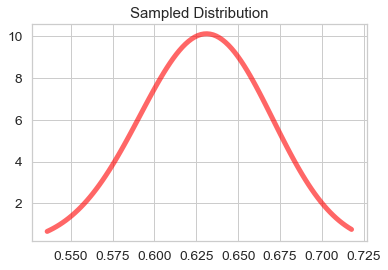

In [12]:
fig, ax = plt.subplots(1, 1)

a, b = bestAlpha, bestBeta
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
ax.title.set_text('Sampled Distribution')

# Goal: Find Prior Transition Distribution from Symptomatic to Hospitalization Compartment for Omicron variant

The transition probability of Omicron varaint from symptomatic to hospitalization is arount 21/569=0.0369 from the France study(https://onlinelibrary.wiley.com/doi/epdf/10.1002/jmv.27613). Add some uncertainty in each side for the CIs, we have (0.02, 0.06) for 20-80% CI, and (0.001, 0.061) for 2-98% CI.

In [13]:
x = [0.001, 0.02, 0.04, 0.06, 0.061]

   bestAlpha  bestBeta  bestCost
0  15.790421     300.0  0.043369


C:\Users\Sibyl\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:615: RuntimeWarning: divide by zero encountered in _beta_cdf
  return _boost._beta_cdf(x, a, b)


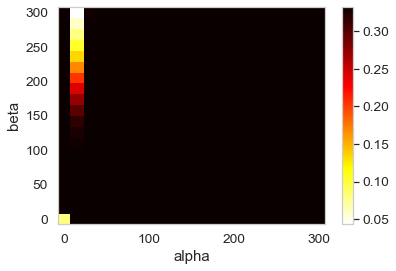

In [14]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 300, a)
beta_b = np.linspace(0.001,300, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha  bestBeta  bestCost
0  11.053263     250.0  0.010267


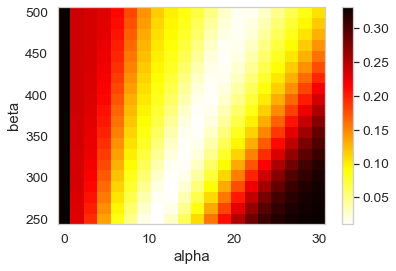

In [15]:
a, b = 20, 20
alpha_a = np.linspace(0.001, 30, a)
beta_b = np.linspace(250,500, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

   bestAlpha    bestBeta  bestCost
0  20.526316  481.578947  0.014116


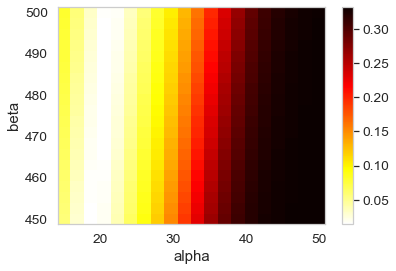

In [16]:
a, b = 20, 20
alpha_a = np.linspace(15, 50, a)
beta_b = np.linspace(450,500, b)
alpha_ba, beta_ba = np.meshgrid(alpha_a, beta_b)

cost_ba = np.zeros((b,a))
for bb in range(b):
    for aa in range(a):
        cost_ba[bb,aa] = calc_loss(alpha_ba[bb,aa], beta_ba[bb,aa], x);
        
minrow, mincol = np.unravel_index(np.argmin(cost_ba, axis=None), cost_ba.shape)
bestAlpha = alpha_ba[minrow, mincol]
bestBeta = beta_ba[minrow, mincol]
best_param = {'bestAlpha':[bestAlpha], 'bestBeta': [bestBeta], 'bestCost': [cost_ba[minrow, mincol]]}
print(pd.DataFrame(best_param))

plt.pcolor(alpha_ba, beta_ba, cost_ba, shading='nearest', cmap='hot_r');
plt.colorbar();
plt.xlabel('alpha');
plt.ylabel('beta');
#plt.savefig('duration loss I to M.png')

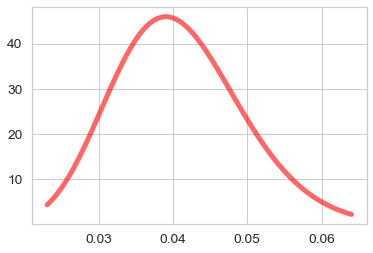

In [17]:
fig, ax = plt.subplots(1, 1)

a, b = bestAlpha, bestBeta
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')